## 전체 처리 및 3세 분류

In [46]:
import numpy as np
import nltk
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Kkma
import re

##코드 최적화는 나중에 진행 예정

#데이터 프레임을 만들기 위한 최기화
ageList = ['3세', '4세', '5세 여자', '5세 남자', '6세 여자', '6세 남자', '7세 여자', '7세 남자']
minMorphList = []
avgMorphList = []
maxMorphList = []



df = pd.read_excel('C:/Users/user/Desktop/nlp/newData.xlsx')
print(df.describe())
print(df.info())
# print(df)
#나이와 문장만 추출한 데이터 프레임
data = df.loc[:,['STT', 'AGE']]
print(data)

#각 나이별 문장 추출
thirdData = df[df.AGE == 3]
thirdData = thirdData['STT']
print(thirdData)

okt = Okt()
kkma = Kkma()
thirdMorphs=[]      #문장의 형태소를 담은 변수
thirdNouns=[]       #문장의 명사를 담은 변수
thirdNounsCount=[]     #문장내, 명사의 갯수를 담은 변수
thirdMorphsCount=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0
minNounsCnt=10
maxNounsCnt=0
nTotal=0

#형태소 평균, 최장, 최단 길이 추출
#낱말 평균, 최장, 최단 길이 추출

##3살 분류##
print(len(thirdData))
for i in range(len(thirdData)):
    thirdData[i] = re.sub(r"[():a-zA-Z]", "", thirdData[i])  #노이즈 제거
    m = okt.morphs(thirdData[i])  # m에 한 문장 내의 형태소 출력
    thirdNouns = okt.nouns(thirdData[i])  # 한 문장 내의 단어
    thirdNounsCount.append(len(thirdNouns)) #한 문장 내의 단어의 갯수를 세어, 리스트에 넣음.
    thirdMorphs.append(m)  # 한 문장의 형태소를 담음
    thirdMorphsCount.append(len(m)) # 한 문장의 형태소의 갯수를 담음

thirdMCount = pd.DataFrame(thirdMorphsCount)
thirdNCount = pd.DataFrame(thirdNounsCount)



print("품사 묶음:",thirdMorphs) # 문장 내에 있는 형태소 출력
print("품사의 수:", thirdMorphsCount) #문장내에 형태소 갯수들의 리스트를 출력
# 최대, 최소, 평균 형태소, 낱말 길이 출력
for j in range(len(thirdMorphsCount)) :
    # 형태소
    if maxMorphCnt < thirdMorphsCount[j]:
        maxMorphCnt = thirdMorphsCount[j]
    if minMorphCnt > thirdMorphsCount[j]:
        minMorphCnt = thirdMorphsCount[j]
    total = total + thirdMorphsCount[j]

    # 낱말
    if maxNounsCnt < thirdNounsCount[j]:
        maxNounsCnt = thirdNounsCount[j]
    if minNounsCnt > thirdNounsCount[j]:
        minNounsCnt = thirdNounsCount[j]
    total = total + thirdNounsCount[j]
avg = total/len(thirdNounsCount)

print("3살 평균 형태소 길이 : ", avg)
print("3살 최대 형태소 길이:", maxMorphCnt)
print("3살 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)


                  ID          AGE
count    1752.000000  1752.000000
mean   282638.992580     5.375000
std     72666.483494     1.317333
min     92324.000000     3.000000
25%    215629.750000     4.750000
50%    285633.000000     5.500000
75%    353371.500000     6.250000
max    360171.000000     7.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1752 non-null   int64 
 1   STT     1752 non-null   object
 2   AGE     1752 non-null   int64 
 3   GENDER  1752 non-null   object
 4   THEMA   1752 non-null   object
dtypes: int64(2), object(3)
memory usage: 68.6+ KB
None
                                      STT  AGE
0                     광장에 비둘기들이 많아요 (SN:)    3
1                         엄마와 광장으로 놀러나왔어요    3
2                                  씽씽 달려요    3
3                                  코를 풀어요    3
4                                   종류대로     

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


품사 묶음: [['광장', '에', '비둘기', '들', '이', '많아요'], ['엄마', '와', '광장', '으로', '놀러', '나왔어요'], ['씽씽', '달려요'], ['코', '를', '풀어요'], ['종류', '대로'], ['모빌', '과', '놀아요'], ['씨앗', '을', '심어요'], ['티비', '를', '봐요'], ['제', '를', '넣어요'], ['코', '가', '간지러워요'], ['비누', '를', '묻혀요'], ['주말', '이에요'], ['난', '컴퓨터', '로', '해', '요'], ['파란', '불', '이에요'], ['할아버지', '도', '계세', '요'], ['트리', '를', '꾸며요'], ['동생', '은', '문제', '를', '풀어요'], ['빨간', '불', '이에요'], ['얼른', '일어나요'], ['차', '들', '이', '멈춰요'], ['스키', '를', '타요'], ['상쾌해요'], ['빵', '을', '만들어요'], ['반죽', '을', '만들어'], ['이사', '를', '가요'], ['신호등', '이', '깜빡', '해요'], ['경기', '해', '요', '축구', '축구', '경기', '해', '요'], ['엄마', '도', '봐요'], ['함께', '응원', '해요'], ['글씨', '연습', '도', '해', '요'], ['바람', '이', '차요'], ['멋진', '옷', '을', '입어요'], ['손', '을', '씻어야', '돼요'], ['빨래', '를', '해', '요'], ['늦잠', '을', '잤어요'], ['밀가루', '를', '준비', '해요'], ['니', '가', '인사', '해요'], ['콤', '해요'], ['짐', '을', '짐', '을', '싸요'], ['거품', '을', '내', '요'], ['숙제', '를', '해', '요'], ['간식', '시간', '이에요'], ['납작하게', '눌러요'], ['학교', '에', '늦었어요'], ['시계', '가', 

## 4세 분류

In [19]:
i = j = 0
fourthMorphs=[]      #문장의 형태소를 담은 변수
fourthNouns=[]       #문장의 명사를 담은 변수
fourthMorphsCount=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fourthData = df[df.AGE == 4]
fourthData = fourthData['STT']
print(fourthData[219+i])


for i in range(len(fourthData)):
    fourthData[i] = re.sub(r"[():a-zA-Z]", "", fourthData[219+i])
    m = okt.morphs(fourthData[219+i])
    m = okt.morphs(fourthData[219+i])
    print("단어:",okt.nouns(fourthData[219+i]))
    fourthMorphs.append(m)
    fourthMorphsCount.append(len(m))

fourthMCount = pd.DataFrame(fourthMorphsCount)



for j in range(len(fourthMorphsCount)) :
    if maxMorphCnt < fourthMorphsCount[j]:
        maxMorphCnt = fourthMorphsCount[j]
    if minMorphCnt > fourthMorphsCount[j]:
        minMorphCnt = fourthMorphsCount[j]
    total = total + fourthMorphsCount[j]
avg = total/len(fourthMorphsCount)
print(total)
print(len(fourthMorphsCount))
print("4살 평균 형태소 길이 : ", avg)
print("4살 최대 형태소 길이:", maxMorphCnt)
print("4살 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

print(data)

엄마랑 같이 양치해요
단어: ['엄마', '양치']
단어: ['물감']
단어: ['케이크']
단어: ['공원']
단어: ['안고']
단어: ['소', '가족']
단어: ['박자']
단어: ['기침']
단어: ['얼룩', '소']
단어: ['장보기']
단어: ['목']
단어: ['그림']
단어: ['크레파스', '도']
단어: ['아기', '아빠']
단어: ['책']
단어: ['아기', '배']
단어: ['동생']
단어: ['머리']
단어: ['색연필', '도']
단어: ['양치질', '해']
단어: ['그림', '숙제']
단어: ['꽃', '그릴', '거']
단어: ['몰래', '책']
단어: ['입', '해']
단어: ['강아지']
단어: ['꽃', '향기']
단어: ['빗자루']
단어: ['초록색', '제일']
단어: ['촛불', '불', '거']
단어: ['양말', '짝']
단어: ['검은색']
단어: ['미술', '시간']
단어: ['이불', '속']
단어: ['오빠', '더']
단어: ['조개', '껍데기']
단어: ['거울']
단어: ['밤하늘']
단어: ['청소', '해']
단어: ['사범']


C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_ne

단어: ['만들기', '시간']
단어: ['채소', '고기', '사']
단어: ['참치', '우유']
단어: ['별', '모양']
단어: ['그림']
단어: ['미술', '시간']
단어: ['발차기', '해']
단어: ['엄마', '장']
단어: ['쓰레기']
단어: ['무지개', '구름']
단어: ['날씨']
단어: ['아기', '소가', '젖']
단어: ['핑크색']
단어: ['꽃']
단어: []
단어: ['양치', '기분']
단어: ['엄마', '소', '아기', '소']
단어: ['친구', '나무']
단어: ['엄마', '아기']
단어: ['바닷가']
단어: ['청소']
단어: ['강아지', '모래', '파']
단어: ['모래성']
단어: ['얼굴']
단어: ['이불', '속']
단어: ['안', '거']
단어: ['비누', '얼굴']
단어: ['피망']
단어: ['갈매기']
단어: ['태권도', '해']
단어: ['색종이']
단어: ['불', '켜']
단어: ['동생', '춤']
단어: ['재채기']
단어: ['감기']
단어: ['헤엄']
단어: []
단어: ['당근']
단어: ['엄마', '요리', '거']
단어: ['달리기', '시합', '해']
단어: ['머리']
단어: ['주먹']
단어: ['그림']
단어: []
단어: ['선물', '거']
단어: ['장', '자주', '가요']
단어: ['생머리']
단어: ['매일', '연습']
단어: ['소풍']
단어: ['오늘', '생일']
단어: ['누가', '일등', '요']
단어: ['무슨', '소원', '요']
단어: ['원']
단어: ['달', '모양']
단어: ['엄마', '소', '젖']
단어: ['빨래', '해']
단어: ['치약', '냄새']
단어: ['무엇', '발견']
단어: ['공원', '산책']
단어: ['우리', '강아지']
단어: ['엄마', '과자']
단어: ['비눗방울']
단어: ['야구', '장갑']
단어: ['운동화', '신어']
단어: ['귀']
단어: ['상추']
단어

## 5세 여자 분류

In [20]:
i = j = 0
fifthMorphsG=[]      #문장의 형태소를 담은 변수
fifthNounsG=[]       #문장의 명사를 담은 변수
fifthMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fifthDataG = df[(df['AGE'] == 5) & (df['GENDER'] == "여")]
print(fifthDataG)
fifthDataG = fifthDataG['STT']
print(fifthDataG)


for i in range(len(fifthDataG)):
    fifthDataG[i] = re.sub(r"[():a-zA-Z]", "", fifthDataG[438+i])
    m = okt.morphs(fifthDataG[438+i])
    m = okt.morphs(fifthDataG[438+i])
    print("단어:",okt.nouns(fifthDataG[438+i]))
    fifthMorphsG.append(m)
    fifthMorphsCountG.append(len(m))

fifthGMCount = pd.DataFrame(fifthMorphsCountG)

for j in range(len(fifthMorphsCountG)) :
    if maxMorphCnt < fifthMorphsCountG[j]:
        maxMorphCnt = fifthMorphsCountG[j]
    if minMorphCnt > fifthMorphsCountG[j]:
        minMorphCnt = fifthMorphsCountG[j]
    total = total + fifthMorphsCountG[j]
avg = total/len(fifthMorphsCountG)
print("5살 여자 평균 형태소 길이 : ", avg)
print("5살 여자 최대 형태소 길이:", maxMorphCnt)
print("5살 여자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)


         ID              STT  AGE GENDER THEMA
438  191752    동물원에 고릴라가 있어요    5      여   고릴라
439  191755        옥수수 삶아주세요    5      여   옥수수
440  191756          난 새가 좋아    5      여   앵무새
441  191757     빨간 소화기를 가져와요    5      여    화재
442  191758      공룡이 사납게 생겼어    5      여    공룡
..      ...              ...  ...    ...   ...
652  199117   레오는 얼룩무늬 고양이예요    5      여   고양이
653  199118     달리다 이마를 다쳤어요    5      여   타박상
654  199119  노란색 빨간색 찰흙이 있어요    5      여    찰흙
655  199120          여행을 떠나요    5      여   비행기
656  199122           웃음이 나요    5      여  베개싸움

[219 rows x 5 columns]
438      동물원에 고릴라가 있어요
439          옥수수 삶아주세요
440            난 새가 좋아
441       빨간 소화기를 가져와요
442        공룡이 사납게 생겼어
            ...       
652     레오는 얼룩무늬 고양이예요
653       달리다 이마를 다쳤어요
654    노란색 빨간색 찰흙이 있어요
655            여행을 떠나요
656             웃음이 나요
Name: STT, Length: 219, dtype: object
단어: ['동물원', '고릴라']
단어: ['옥수수']
단어: ['난', '새']
단어: ['소화기']
단어: ['공룡']
단어: ['말', '꼬리', '털']
단어: ['오리가', '네', '마리']
단어: ['펭귄

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

단어: ['머리']
단어: ['더', '자고']
단어: ['자명종']
단어: ['엄마', '머리']
단어: ['간식', '시간']
단어: ['바구니', '과일', '빵']
단어: ['오렌지']
단어: ['땅', '말뚤', '박아']
단어: ['엄마', '오늘']
단어: ['회사', '시대']
단어: ['텐트', '해']
단어: ['친구', '음악']
단어: ['머리']
단어: ['귓속말', '해']
단어: ['아빠', '기타']
단어: ['친구', '비밀', '이야기', '해']
단어: ['계단', '아주']
단어: ['시간']
단어: ['아침']
단어: ['친구', '캠핑']
단어: ['잔디', '돗자리']
단어: ['아빠', '자고', '계세']
단어: ['칸']
단어: []
단어: ['가장', '친구']
단어: ['엄마', '불']
단어: ['침대']
단어: ['엄마', '이마', '뽀뽀']
단어: ['아빠', '더', '대요']
단어: ['천']
단어: ['말']
단어: ['커피']
단어: ['밤', '일']
단어: ['다음', '무얼']
단어: ['노래']
단어: ['엄마', '커피']
단어: ['집', '손님']
단어: ['무엇', '요']
단어: ['아빠', '회사', '손님', '이세']
단어: ['과자']
단어: ['물']
단어: ['털']
단어: ['감기']
단어: ['색연필']
단어: ['손님', '음식']
단어: ['강아지', '털', '어요']
단어: ['불']
단어: ['미용', '해']
단어: ['분홍', '리본', '머리']
단어: ['전화', '걸', '수']
단어: ['냄새']
단어: ['차']
단어: ['동물병원']
단어: ['열']
단어: ['강아지']
단어: ['인터넷', '수']
단어: ['꽃']
단어: ['강아지', '배']
단어: ['바베큐', '파티', '해']
단어: ['강아지', '밥']
단어: ['서현', '핑크색', '드레스']
단어: ['간식', '달라', '애교']
단어: ['해열제']
단어: ['정원']

## 5세 남자 분류

In [21]:
i = j = 0
fifthMorphsB=[]      #문장의 형태소를 담은 변수
fifthNounsB=[]       #문장의 명사를 담은 변수
fifthMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


fifthDataB = df[(df["AGE"] == 5) & (df["GENDER"] == "남")]
fifthDataB = fifthDataB['STT']
print(fifthDataB)


for i in range(len(fifthDataB)):
    fifthDataB[i] = re.sub(r"[()a-zA-Z]", "", fifthDataB[657 + i])
    m = okt.morphs(fifthDataB[657+i])
    m = okt.morphs(fifthDataB[657+i])
    print("단어:",okt.nouns(fifthDataB[657+i]))
    fifthMorphsB.append(m)
    fifthMorphsCountB.append(len(m))

fifthMMCout = pd.DataFrame(fifthMorphsCountB)

for j in range(len(fifthMorphsCountB)) :
    if maxMorphCnt < fifthMorphsCountB[j]:
        maxMorphCnt = fifthMorphsCountB[j]
    if minMorphCnt > fifthMorphsCountB[j]:
        minMorphCnt = fifthMorphsCountB[j]
    total = total + fifthMorphsCountB[j]
avg = total/len(fifthMorphsCountB)
print("5살 남자 평균 형태소 길이 : ", avg)
print("5살 남자 최대 형태소 길이:", maxMorphCnt)
print("5살 남자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

657       청소를 안해서 거미줄이 있네요
658           병아리가 알에서 깼어요
659    어제 아빠가 케이크를 갖고 오셨어요
660       도둑이 안을 들여다 보고 있네
661       건강하면 뭐든지 할 수 있어요
              ...         
871             코가 막혀서 답답해
872          거미는 다리가 여덟개예요
873             하마는 덩치가 커요
874          거미는 동굴에서도 살아요
875       난 혼자서 단추 잠글 수 있어
Name: STT, Length: 219, dtype: object
단어: ['청소', '안해', '거미줄']
단어: ['병아리', '알']
단어: ['어제', '아빠', '케이크']
단어: ['도둑', '안', '보고']
단어: ['뭐', '수']
단어: ['상어', '바다']
단어: ['콜라']
단어: ['채소']
단어: ['친구', '미끄럼틀']
단어: ['머리']
단어: ['곰', '인형', '서로']
단어: ['귤', '개']
단어: ['어제', '아빠', '도너츠']
단어: ['놀이', '공원', '사촌']
단어: ['놀이', '공원', '탈', '것']
단어: ['도너츠', '친구']
단어: []
단어: ['독', '뱀']
단어: ['다음', '회전목마']
단어: ['청소']
단어: ['코끼리', '덩', '치가']
단어: ['기분']
단어: ['카트', '하나', '가득', '음식']
단어: ['사자', '쥐', '옛날', '이야기']
단어: ['주먹', '불끈']
단어: ['닭', '날개', '날']
단어: ['벽', '흰색']
단어: ['밀가루', '과자']
단어: ['컵케이크']
단어: ['하마', '입']
단어: ['난', '치즈']
단어: ['하나', '상']
단어: ['영어선생님', '감기']


C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_ne

단어: ['다람쥐', '도토리']
단어: ['이', '강아지', '사람', '안', '물어']
단어: ['거북이', '등']
단어: ['부끄럼', '타']
단어: ['아침', '달걀']
단어: ['강아지', '사진']
단어: ['비행기']
단어: ['햇빛']
단어: ['우리', '집', '강아지']
단어: ['운동']
단어: ['기침약']
단어: ['코']
단어: ['우리', '가족', '치킨']
단어: ['방이', '텅']
단어: ['음식물', '쓰레기통']
단어: ['어디가', '엄마', '곁']
단어: ['비']
단어: ['단추', '것']
단어: ['손', '손']
단어: ['동물원', '호랑이']
단어: ['병아리', '거']
단어: ['콧물', '약']
단어: ['단추', '것좀']
단어: ['돼지', '새끼']
단어: ['냄비', '김']
단어: ['컵케이크']
단어: ['감기', '걸러셔', '목도리']
단어: ['머리', '양갈래']
단어: ['돼지', '새끼', '엄마', '젖']
단어: ['우유', '오른쪽', '문']
단어: ['꽃', '무늬', '옷', '자주']
단어: ['머리', '다시']
단어: ['난', '딸기', '맛']
단어: ['지금', '화가']
단어: ['케이크']
단어: ['간식', '도너츠']
단어: ['운동화']
단어: ['사과']
단어: ['마음대로', '안', '심통']
단어: ['난', '봄']
단어: ['내', '바나나']
단어: ['상한', '과일', '안']
단어: ['거미줄', '파리']
단어: ['난', '그네', '높이', '탈', '수']
단어: ['코', '안']
단어: ['가방', '안', '책', '가득']
단어: ['피자', '때', '콜라']
단어: ['엄마', '시럽', '약', '숟가락']
단어: ['노란색', '티셔츠']
단어: ['모습']
단어: ['토마토', '샐러드']
단어: ['치즈', '우유']
단어: ['기침']
단어: ['표정']
단어: ['귤']
단어: ['기침', '심

## 6세 여자 분류

In [23]:
i = j = 0
sixthMorphsG=[]      #문장의 형태소를 담은 변수
sixthNounsG=[]       #문장의 명사를 담은 변수
sixthMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


sixthDataG = df[(df["AGE"] == 6) & (df["GENDER"] == "여")]
print(sixthDataG)
sixthDataG = sixthDataG['STT']
print(fifthDataG)


for i in range(len(sixthDataG)):
    sixthDataG[i] = re.sub(r"[()a-zA-Z]", "", sixthDataG[1095 + i])
    m = okt.morphs(sixthDataG[1095+i])
    m = okt.morphs(sixthDataG[1095+i])
    print("단어:",okt.nouns(sixthDataG[1095+i]))
    sixthMorphsG.append(m)
    sixthMorphsCountG.append(len(m))

sixthGMCount = pd.DataFrame(sixthMorphsCountG)

for j in range(len(sixthMorphsCountG)) :
    if maxMorphCnt < sixthMorphsCountG[j]:
        maxMorphCnt = sixthMorphsCountG[j]
    if minMorphCnt > sixthMorphsCountG[j]:
        minMorphCnt = sixthMorphsCountG[j]
    total = total + sixthMorphsCountG[j]
avg = total/len(sixthMorphsCountG)
print("6살 여자 평균 형태소 길이 : ", avg)
print("6살 여자 최대 형태소 길이:", maxMorphCnt)
print("6살 여자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

          ID                  STT  AGE GENDER    THEMA
1095  218302            맞기 정말 싫은데    6      여       주사
1096  218303     (SP:사)탕이 딸기 맛이에요    6      여       사탕
1097  218304             아파서 괴로워요    6      여    소녀 체온
1098  218305  동물원에서 사자 앞에서 사진을 찍어    6      여       사자
1099  218306           코가 막혀서 답답해    6      여        코
...      ...                  ...  ...    ...      ...
1309  218516        좋아하는 바나나도 샀어요    6      여       카트
1310  218517         아기가 케이크를 먹어요    6      여     케잌먹기
1311  218518         운동화가 너무 더러워요    6      여  더러운 운동화
1312  218519     도둑이 검은 옷을 입고 있어요    6      여       도둑
1313  218520              몸살이 났어요    6      여    차 마시기

[219 rows x 5 columns]
438      동물원에 고릴라가 있어요
439          옥수수 삶아주세요
440            난 새가 좋아
441       빨간 소화기를 가져와요
442        공룡이 사납게 생겼어
            ...       
214     레오는 얼룩무늬 고양이예요
215       달리다 이마를 다쳤어요
216    노란색 빨간색 찰흙이 있어요
217            여행을 떠나요
218             웃음이 나요
Name: STT, Length: 438, dtype: object
단어: ['정말']
단어: ['사', '탕',

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

단어: ['셔츠']
단어: ['마음대로', '안', '심통']
단어: ['다리', '여덟']
단어: ['버스', '손잡이', '잡']
단어: ['연습']
단어: ['놀이터', '그네']
단어: ['만', '두']
단어: ['무릎', '상처']
단어: ['수박']
단어: ['감기', '목도리']
단어: []
단어: ['주스', '컵']
단어: ['봄']
단어: ['감기', '열']
단어: ['수줍음', '편이']
단어: ['귀가']
단어: []
단어: ['사자', '울음소리', '우렁차']
단어: ['상어']
단어: ['여름', '안']
단어: ['곰', '인형', '서로']
단어: ['수박', '화채']
단어: ['청소', '안해', '거미줄']
단어: ['기']
단어: ['감기']
단어: ['친구']
단어: ['사자', '쥐', '옛날', '이야기']
단어: ['기침약']
단어: ['주스', '빨대']
단어: []
단어: ['우리', '카레', '자주']
단어: ['과자', '것']
단어: ['사탕']
단어: []
단어: ['햄버거', '양상추', '토마토']
단어: ['당근']
단어: ['감기', '옮', '옮았나봐']
단어: ['쌈']
단어: ['아인', '파란색', '곰인형']
단어: ['아무', '말']
단어: ['할로윈', '때', '뭐', '수']
단어: []
단어: ['물고기', '바다']
단어: ['프라이드', '치킨']
단어: ['체온계', '열', '재고']
단어: ['커서', '가수']
단어: ['코끼리', '덩', '치가']
단어: ['당근', '건강']
단어: ['비', '오니', '우산']
단어: ['사과']
단어: ['은', '꼬끼오']
단어: ['엄마', '주신', '것']
단어: ['회전', '목마']
단어: ['케이크']
단어: ['꼼짝', '안', '해']
단어: ['탕']
단어: ['난', '그네', '높이', '탈', '수']
단어: ['둘', '침대']
단어: ['만두', '간장']
단어: ['몸']
단어: ['이빨',

## 6세 남자 분류

In [24]:
i = j = 0
sixthMorphsB=[]      #문장의 형태소를 담은 변수
sixthNounsB=[]       #문장의 명사를 담은 변수
sixthMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


sixthDataB = df[(df["AGE"] == 6) & (df["GENDER"]=="남")]
print(sixthDataB)
sixthDataB = sixthDataB['STT']
print(sixthDataB)


for i in range(len(sixthDataB)):
    sixthDataB[i] = re.sub(r"[()a-zA-Z]", "", sixthDataB[876 + i])
    m = okt.morphs(sixthDataB[876+i])
    m = okt.morphs(sixthDataB[876+i])
    m = okt.morphs(sixthDataB[876+i])
    print("단어:",okt.nouns(sixthDataB[876+i]))
    sixthMorphsB.append(m)
    sixthMorphsCountB.append(len(m))

sixthMMCount = pd.DataFrame(sixthMorphsCountB)

for j in range(len(sixthMorphsCountB)) :
    if maxMorphCnt < sixthMorphsCountB[j]:
        maxMorphCnt = sixthMorphsCountB[j]
    if minMorphCnt > sixthMorphsCountB[j]:
        minMorphCnt = sixthMorphsCountB[j]
    total = total + sixthMorphsCountB[j]
avg = total/len(sixthMorphsCountB)
print("6살 남자 평균 형태소 길이 : ", avg)
print("6살 남자 최대 형태소 길이:", maxMorphCnt)
print("6살 남자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

          ID                        STT  AGE GENDER       THEMA
876   353123              노란색 티셔츠를 입었어요    6      남     장난감 비행기
877   353124                아기가 너무 슬픈가봐    6      남       우는 아기
878   353125  (SP:써)(NO:비가)비가 오니까 우산을 써    6      남          우산
879   353126                지금 화가 많이 났네    6      남  입 삐죽 내민 아이
880   353127           (NO:)커피를 따르고 있어요    6      남          커피
...      ...                        ...  ...    ...         ...
1090  353337                어깨동무를 하고있어요    6      남        외양묘사
1091  353338                추워서 장갑을 꼈어요    6      남        외양묘사
1092  353339                 엄마가 나를 찾아요    6      남        숨바꼭질
1093  353340            노란색 티셔츠를 입고 있어요    6      남        외양묘사
1094  353341              손으로 케이크를 먹었어요    6      남        케잌먹기

[219 rows x 5 columns]
876                 노란색 티셔츠를 입었어요
877                   아기가 너무 슬픈가봐
878     (SP:써)(NO:비가)비가 오니까 우산을 써
879                   지금 화가 많이 났네
880              (NO:)커피를 따르고 있어요
                  ...            
1090

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

단어: ['눈물', '자꾸']
단어: ['수', '내', '힘', '수']
단어: ['살이', '세', '살이']
단어: ['어머', '도둑']
단어: ['지금', '기분']
단어: ['표정']
단어: ['운동화', '해']
단어: ['난', '혼자', '단추', '수']
단어: ['장난감', '비행기']
단어: ['친구']
단어: ['간호사', '주사']
단어: ['휴지', '혼자', '코']
단어: ['학교', '못']
단어: ['가방', '안', '책', '가득']
단어: ['로션', '얼굴']
단어: ['이불']
단어: ['수줍음', '편이']
단어: ['엄마', '슈퍼']
단어: ['음식물', '쓰레기통']
단어: ['내', '사촌', '사탕', '아주']
단어: ['냄비', '뚜껑']
단어: ['커서', '비행사']
단어: ['얼음', '주머니', '머리']
단어: []
단어: ['아빠', '고', '면']
단어: ['공원', '강아지']
단어: ['손', '요']
단어: ['커피']
단어: []
단어: ['애', '냄비']
단어: ['머리핀', '자주', '해']
단어: ['종이', '상자', '안']
단어: ['장화', '신어']
단어: ['비']
단어: ['비누', '손']
단어: ['눈', '펑펑']
단어: ['기분']
단어: ['친구', '기분', '안']
단어: ['몸살']
단어: []
단어: ['과일', '상']
단어: ['강아지', '사진']
단어: ['아인', '다섯', '살이']
단어: ['분홍색', '치마']
단어: ['겨울']
단어: ['아인', '타']
단어: ['수지', '목걸이', '걸']
단어: ['엄마']
단어: []
단어: ['내', '바나나']
단어: ['손']
단어: ['마음대로', '안', '심통']
단어: ['커피', '색']
단어: ['콧물']
단어: ['부끄럼', '타']
단어: ['유리', '금']
단어: ['머리']
단어: ['엄지', '척']
단어: ['어머', '어쩌면']
단어: ['요', '기침']

## 7세 여자 분류

In [25]:
i = j = 0
seventhMorphsG=[]      #문장의 형태소를 담은 변수
seventhNounsG=[]       #문장의 명사를 담은 변수
seventhMorphsCountG=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


seventhDataG = df[(df["AGE"] == 7) & (df["GENDER"] == "여")]
print(seventhDataG)
seventhDataG = seventhDataG['STT']
print(seventhDataG)


for i in range(len(seventhDataG)):
    seventhDataG[i] = re.sub(r"[()a-zA-Z]", "", seventhDataG[1314 + i])
    m = okt.morphs(seventhDataG[1314+i])
    m = okt.morphs(seventhDataG[1314+i])
    print("단어:",okt.nouns(seventhDataG[1314+i]))
    seventhMorphsG.append(m)
    seventhMorphsCountG.append(len(m))

seventhGMCount = pd.DataFrame(seventhMorphsCountG)

for j in range(len(seventhMorphsCountG)) :
    if maxMorphCnt < seventhMorphsCountG[j]:
        maxMorphCnt = seventhMorphsCountG[j]
    if minMorphCnt > seventhMorphsCountG[j]:
        minMorphCnt = seventhMorphsCountG[j]
    total = total + seventhMorphsCountG[j]
avg = total/len(seventhMorphsCountG)
print("7살 여자 평균 형태소 길이 : ", avg)
print("7살 여자 최대 형태소 길이:", maxMorphCnt)
print("7살 여자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

          ID                            STT  AGE GENDER       THEMA
1314  217997                     나랑 할리갈리 할래    7      여       보드 게임
1315  217998         나 오늘 바이올린 선생님 오시는 날이야     7      여          하교
1316  217999                  우리 엄마는 선생님이야     7      여  가족에 대해 말하기
1317  218000          우리 오늘 노는 거 엄마 허락 받았어     7      여          하교
1318  218001                너 숙제 다했어 게임해도 돼    7      여          가정
...      ...                            ...  ...    ...         ...
1528  218722                  진달래꽃이 활짝 피었어     7      여          시각
1529  218723             어디서 피자 냄새가 나는 거 같아    7      여          후각
1530  218724                    김치가 너무 매워요     7      여  아침 식사를 할 때
1531  218725  선생님이 나가시자 애들이 또 시끄럽게 떠들기 시작했어    7      여          청각
1532  218726     자박자박 누군가에서 (SP:) 발소리가 들려요     7      여          청각

[219 rows x 5 columns]
1314                       나랑 할리갈리 할래
1315           나 오늘 바이올린 선생님 오시는 날이야 
1316                    우리 엄마는 선생님이야 
1317            우리 오늘 노는 거 엄마 허락 받았어 
1318    

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

단어: ['오늘', '못', '집']
단어: ['엄마', '물어']
단어: ['부루마블', '안']
단어: ['우리', '삼촌', '베트남']
단어: ['우리', '내일', '숙제', '뭐']
단어: ['오늘', '다음', '또', '하자']
단어: ['우리', '이모', '미국', '살']
단어: ['엄마', '밥']
단어: ['가위', '풀']
단어: ['우리', '아빠', '은행', '일해']
단어: ['엄마', '티브이', '진짜']
단어: ['우리', '집']
단어: ['나', '지금', '숙제']
단어: ['생일', '초대']
단어: ['너', '오늘', '방과후', '수업']
단어: ['생일', '축하', '거', '선물']
단어: ['나', '주말', '아빠', '캐치', '볼', '해']
단어: ['급식', '실']
단어: ['내', '거', '다섯', '칸']
단어: []
단어: ['나', '오늘', '영어학원', '날']
단어: ['우리', '집', '고양이', '너', '반려동물']
단어: ['우리', '젠', '하자']
단어: ['잔치국수']
단어: ['우리', '가족', '네', '명']
단어: ['주말', '공원', '자전거']
단어: ['너', '이제', '내', '차례']
단어: ['나', '오늘', '학원', '가기']
단어: ['주스', '밥']
단어: ['방학', '뭐', '어디']
단어: ['우리', '집', '내', '생일', '파티', '너']
단어: ['밥']
단어: ['너', '오늘', '태권도', '날']
단어: ['이번', '번만', '게']
단어: ['이번', '내', '거']
단어: ['너', '빨간색', '색연필', '나', '좀']
단어: ['토요일', '할머니', '댁']
단어: ['너', '루미큐브', '줄', '알', '해', '볼']
단어: ['나', '유튜브', '못', '엄마', '금지']
단어: ['나', '생일', '파티', '수']
단어: ['나', '여동생']
단어: ['내', '말', 

## 7세 남자 분류

In [26]:
i = j = 0
seventhMorphsB=[]      #문장의 형태소를 담은 변수
seventhNounsB=[]       #문장의 명사를 담은 변수
seventhMorphsCountB=[] #문장내, 형태소의 숫자를 담은 변수
maxMorphCnt = 0 #문장내, 최대 형태소
minMorphCnt = 10 #문장내, 최소 형태소
total = 0


seventhDataB = df[(df["AGE"] == 7) & (df["GENDER"] == "남")]
print(seventhDataB)
seventhDataB = seventhDataB['STT']
print(seventhDataB)


for i in range(len(seventhDataB)):
    seventhDataB[i] = re.sub(r"[()a-zA-Z]", "", seventhDataB[1533 + i])
    m = okt.morphs(seventhDataB[1533+i])
    m = okt.morphs(seventhDataB[1533+i])
    print("단어:",okt.nouns(seventhDataB[1533+i]))
    seventhMorphsB.append(m)
    seventhMorphsCountB.append(len(m))

seventhMMCount = pd.DataFrame(seventhMorphsCountB)

for j in range(len(seventhMorphsCountB)) :
    if maxMorphCnt < seventhMorphsCountB[j]:
        maxMorphCnt = seventhMorphsCountB[j]
    if minMorphCnt > seventhMorphsCountB[j]:
        minMorphCnt = seventhMorphsCountB[j]
    total = total + seventhMorphsCountB[j]
avg = total/len(seventhMorphsCountB)
print("7살 남자 평균 형태소 길이 : ", avg)
print("7살 남자 최대 형태소 길이:", maxMorphCnt)
print("7살 남자 최소 형태소 길이:", minMorphCnt)
minMorphList.append(minMorphCnt)
maxMorphList.append(maxMorphCnt)
avgMorphList.append(avg)

          ID                                  STT  AGE GENDER          THEMA
1533  353463         키 큰 나무들이 일렬로 (SP:서 )쭉 서 있어요     7      남             시각
1534  353464                    새싹은 연한 초록색 빛이에요      7      남             시각
1535  353465           (NO:)차들이 너무 빵빵거려서 시끄러워 죽겠어    7      남             청각
1536  353466                 소리 못 들었어 분명히 여기서 났는데    7      남             청각
1537  353467          아침에 보니까 베란다의 국화꽃이 활짝 피었더라      7      남             시각
...      ...                                  ...  ...    ...            ...
1747  353677  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요     7      남             청각
1748  353678                 겨울왕국 투도 나왔는데 투도 재미있어    7      남           겨울왕국
1749  353679                           화장실 가고 싶어요    7      남            차 안
1750  353680                      친구가 자꾸 짜증나게 해요     7      남  기분이나 감정 표현하기 
1751  353681                       윗집에서 자꾸 쿵쾅거려요     7      남             청각

[219 rows x 5 columns]
1533           키 큰 나무들이 일렬로 (SP:서 )쭉 서 있어요 
1534    

C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\anaconda3\envs\nlpV\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

단어: ['비', '소리']
단어: ['이제', '샌드위치', '세모']
단어: ['저', '나무', '기린']
단어: ['저', '언덕', '꼭', '모자']
단어: ['분홍색', '하트', '모양']
단어: ['게', '꼭', '소리', '묵', '소리']
단어: ['진달래꽃', '활짝']
단어: ['건', '처음']
단어: ['놀이터']
단어: ['때', '서서', '자']
단어: ['혼자', '말']
단어: ['학교', '친구']
단어: ['나', '입', '나']
단어: ['저', '잘못', '거', '제']
단어: ['고양이', '왜', '데', '안']
단어: ['핸드폰', '게임', '해']
단어: ['봉평', '메밀', '꽃', '필', '무렵', '소설', '배경', '곳']
단어: ['흥분', '잠', '안']
단어: ['거나']
단어: ['살금살금']
단어: ['나', '게임', '거', '거', '공부', '거']
단어: ['소리', '나']
단어: ['펜', '두', '개']
단어: ['엄마', '경치', '병산서원']
단어: ['진짜', '완전']
단어: ['지금', '안', '완성']
단어: ['우리', '봉평', '오일장', '시장']
단어: ['어유', '소름']
단어: ['동생', '허락', '내', '장난감', '막']
단어: ['결혼식장', '친척']
단어: []
단어: ['왜', '나', '양보']
단어: ['파란', '불', '왜', '우리', '안', '가요']
단어: ['고양이', '울']
단어: ['삼촌', '결혼', '차려', '결혼식장']
단어: ['누가', '소리', '노래']
단어: ['강아지', '왜', '목줄']
단어: ['천둥', '소리', '깜짝']
단어: ['그', '노래']
단어: ['아이크', '아이스크림', '사도', '스크류바', '요']
단어: ['나', '거']
단어: ['경', '주', '침', '성대']
단어: ['친구', '깔깔', '거리']
단어: ['나뭇잎', '바스락', '거리

## DATA FRAME 만들기

In [115]:
print(ageList)
print(avgMorphList)
print(maxMorphList)
print(minMorphList)

analDf = pd.DataFrame((zip(ageList, avgMorphList, maxMorphList, minMorphList)), columns = ["나이", "평균 형태소의 길이", "최장 형태소의 길이", "최단 형태소의 길이"])
print(analDf)

['3세', '4세', '5세 여자', '5세 남자', '6세 여자', '6세 남자', '7세 여자', '7세 남자']
[3.5159817351598175, 3.689497716894977, 4.534246575342466, 5.136986301369863, 5.420091324200913, 6.228310502283105, 7.1826484018264845, 8.123287671232877]
[9, 7, 10, 12, 13, 18, 25, 23]
[1, 2, 1, 2, 1, 1, 2, 2]
      나이  평균 형태소의 길이  최장 형태소의 길이  최단 형태소의 길이
0     3세    3.515982           9           1
1     4세    3.689498           7           2
2  5세 여자    4.534247          10           1
3  5세 남자    5.136986          12           2
4  6세 여자    5.420091          13           1
5  6세 남자    6.228311          18           1
6  7세 여자    7.182648          25           2
7  7세 남자    8.123288          23           2


## 다중선형 회귀(Multiple Linear Regression)

In [47]:
#data frame에 형태소 숫자 추가
mData = pd.concat([thirdMCount, fourthMCount, fifthGMCount, fifthMMCout, sixthMMCount, sixthGMCount, seventhGMCount, seventhMMCount], ignore_index=True )
data = pd.concat([data, mData], axis = 1)

print(data)

                                      STT  AGE   0
0                     광장에 비둘기들이 많아요 (SN:)    3   6
1                         엄마와 광장으로 놀러나왔어요    3   6
2                                  씽씽 달려요    3   2
3                                  코를 풀어요    3   3
4                                   종류대로     3   2
...                                   ...  ...  ..
1747  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요     7  18
1748                 겨울왕국 투도 나왔는데 투도 재미있어    7   5
1749                           화장실 가고 싶어요    7   3
1750                      친구가 자꾸 짜증나게 해요     7   6
1751                       윗집에서 자꾸 쿵쾅거려요     7   5

[1752 rows x 3 columns]


In [48]:
data.rename(columns={0:'형태소'}, inplace = True)
print(data.columns)
print(data)




Index(['STT', 'AGE', '형태소'], dtype='object')
                                      STT  AGE  형태소
0                     광장에 비둘기들이 많아요 (SN:)    3    6
1                         엄마와 광장으로 놀러나왔어요    3    6
2                                  씽씽 달려요    3    2
3                                  코를 풀어요    3    3
4                                   종류대로     3    2
...                                   ...  ...  ...
1747  (NO:)(NO:엄마는) 제 노랫소리가 (SP:좋)듣기 좋에요     7   18
1748                 겨울왕국 투도 나왔는데 투도 재미있어    7    5
1749                           화장실 가고 싶어요    7    3
1750                      친구가 자꾸 짜증나게 해요     7    6
1751                       윗집에서 자꾸 쿵쾅거려요     7    5

[1752 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
x = data['형태소']
y = data['']

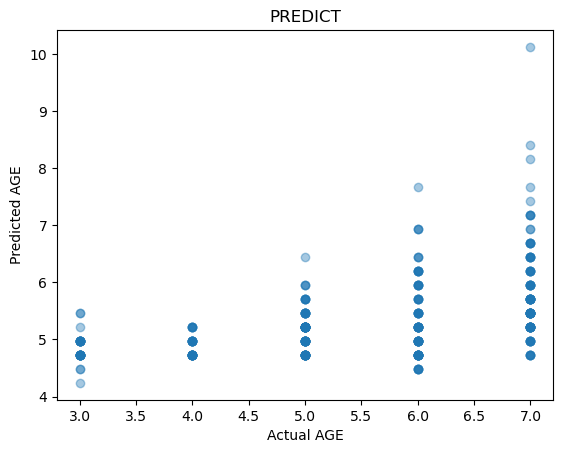

0.26872451294315636
0.21064410136742018


In [57]:
#데이터 셋 분리하기
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x=data[["형태소"]]
y=data[["AGE"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
lg = LinearRegression()
lg.fit(x_train, y_train)

y_predict = lg.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual AGE")
plt.ylabel("Predicted AGE")
plt.title("PREDICT")
plt.show()
print(lg.score(x_train,y_train))
print(lg.score(x_test, y_test))


